# Image Preprocessing

In [1]:
# Import necessary lib.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Data augmentation on training variable

train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [3]:
# Data augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

# Apply ImageDataGenerator Functionality To Train And Test set

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
x_train = train_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\IBM\project\data set\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [9]:
x_test = test_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\IBM\project\data set\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [11]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

# MODEL BUILDING

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [13]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

C:\Users\manoj\AppData\Local\Temp\ipykernel_27876\2466348400.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 27s 773ms/step - loss: 0.8266 - accuracy: 0.7067 - val_loss: 0.3419 - val_accuracy: 0.9093
Epoch 2/10
30/30 [==============================] - 17s 563ms/step - loss: 0.1845 - accuracy: 0.9468
Epoch 3/10
30/30 [==============================] - 17s 567ms/step - loss: 0.0899 - accuracy: 0.9740
Epoch 4/10
30/30 [==============================] - 17s 580ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 5/10
30/30 [==============================] - 18s 608ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 6/10
30/30 [==============================] - 18s 610ms/step - loss: 0.0180 - accuracy: 0.9957
Epoch 7/10
30/30 [==============================] - 19s 637ms/step - loss: 0.0148 - accuracy: 0.9958
Epoch 8/10
30/30 [==============================] - 20s 680ms/step - loss: 0.0126 - accuracy: 0.9971
Epoch 9/10
30/30 [==============================] - 18s 615ms/step - loss: 0.0091 - accuracy: 0.9973
Epoch 10/10
30/30 [==============================

# Saving the Model

In [15]:
model.save('Model.h5')

In [16]:
# Convert the Saved Model to a Tar Compressed Format
!tar -zcvf IBM_TrainedModel.tgz Model.h5

a Model.h5


In [17]:
%%bash
ls -ll

Couldn't find program: 'bash'


# Watson Machine Learning

In [18]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "mNVF7E95G-awR213njShj1GiUfN-1SpPq-ko8Wx7na1-"
}

client = APIClient(wml_credentials)

# Save to Deployment Space

In [19]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [20]:
space_uid = guid_from_space_name(client, 'communication_model_deployment')
print("Space UID : ", space_uid)

Space UID :  21c15ae0-ee26-497d-b615-eb30ef2e16fe


In [21]:
client.set.default_space(space_uid)

'SUCCESS'

In [22]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [23]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

# STORING THE MODEL_ID FOR DATASET.H5

In [24]:
model_details = client.repository.store_model(model='IBM_TrainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\ibm_watson_machine_learning\repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


# TEST THE MODEL

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [27]:
model = load_model('Model.h5')

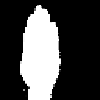

In [29]:
img = image.load_img(r"C:\Users\manoj\Desktop\New folder (3)\New folder\2.png",target_size = (100,100))
img